# Predicting Car Prices - k-nearest neighbors

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [6]:
# Display options
pd.options.display.max_columns=99

## Explore Data

In [2]:
cars = pd.read_csv("C:\GitHub\imports-85.data")

In [7]:
cars.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [8]:
cars.columns

Index(['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd',
       'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four',
       '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27',
       '13495'],
      dtype='object')

The dataset doesn't have column names, so the first row is taken as headers. So we should import without headers and then add column names

In [10]:
cars = pd.read_csv("C:\GitHub\imports-85.data",header =None)

In [6]:
cars.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [11]:
cars.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [12]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [13]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg',
       'price'],
      dtype='object')

In [14]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_numeric = cars[continuous_values_cols]

In [15]:
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning Data

In [16]:
#Replacing all '?' in the dataframe with nan
cars_numeric = cars_numeric.replace('?', np.nan)

In [17]:
cars_numeric.head()
#cars["price"].value_counts()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [18]:
cars_numeric = cars_numeric.astype('float')
cars_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [19]:
#price column has 4 null values and since this is the target column, 
#it cannot have null values. So, remove rows with null values
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [20]:
#impute other columns with missing values with mean of their columns
cars_numeric = cars_numeric.fillna(cars_numeric.mean())
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [21]:
# Except target column normalize all other columns to range from 0 to 1
carsn = cars_numeric.copy()
price_col = carsn["price"]
cars_nor = (carsn - carsn.min())/(carsn.max()-carsn.min())
cars_nor.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


In [22]:
cars_nor["price"] = price_col

# Univariate k-nearest neighbors model

In [25]:
def knn_train_test(train_col, tar_col, df):
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)
    
    split_row = int(df.shape[0]/2)
    train_df = df_rand.iloc[0:split_row]
    test_df = df_rand.iloc[split_row:]
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
    knn.fit(train_df[[train_col]], train_df[tar_col])
    predictions = knn.predict(test_df[[train_col]])
    rmse = np.sqrt(mean_squared_error(test_df[tar_col], predictions))
    return rmse

rmses_results = {}
train_cols = cars_nor.columns.drop("price")
for col in train_cols:
    rmse = knn_train_test(col, "price" , cars_nor)
    rmses_results[col] = rmse
    
rmses_results_series = pd.Series(rmses_results)
rmses_results_series.sort_values()    

horsepower            4267.730361
highway-mpg           4628.793094
city-mpg              4814.778015
curb-weight           5166.828581
width                 7110.412630
compression-rate      8096.301512
normalized-losses     8131.436882
length                8304.189346
stroke                9334.714914
peak-rpm              9759.209970
wheel-base            9969.243292
height               10839.693636
bore                 13397.091693
dtype: float64

# With k values

In [26]:

def knn_train_test(train_col, tar_col, df):
    
    # randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)
    
    split_row = int(df.shape[0]/2)
    train_df = df_rand.iloc[0:split_row]
    test_df = df_rand.iloc[split_row:]
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        np.random.seed(1)
        knn.fit(train_df[[train_col]], train_df[tar_col])
        predictions = knn.predict(test_df[[train_col]])
        rmse = np.sqrt(mean_squared_error(test_df[tar_col], predictions))
        k_rmses[k] = rmse
        
    return k_rmses


k_rmse_results = {}
train_cols = cars_nor.columns.drop("price")
for col in train_cols:
    rmse = knn_train_test(col, "price" , cars_nor)
    k_rmse_results[col] = rmse
    
k_rmse_results    

{'normalized-losses': {1: 11628.904782718988,
  3: 9578.793245190305,
  5: 8131.436882072488,
  7: 7441.814253467208,
  9: 7644.0837748147915},
 'wheel-base': {1: 8052.050206913359,
  3: 9171.153878561105,
  5: 9969.243291700175,
  7: 8938.808809133783,
  9: 8637.3043859821},
 'length': {1: 10053.579063701594,
  3: 8230.050248540974,
  5: 8304.189346264562,
  7: 8483.928913734228,
  9: 7655.12304417215},
 'width': {1: 8044.1444455819,
  3: 7234.558219432825,
  5: 7110.412630045104,
  7: 6621.848358316696,
  9: 6531.417638109127},
 'height': {1: 13032.276289928392,
  3: 11411.019683044135,
  5: 10839.693635873846,
  7: 10041.327943738908,
  9: 9313.330965281266},
 'curb-weight': {1: 6566.749175404316,
  3: 5635.184748392448,
  5: 5166.828580646175,
  7: 5239.631250704795,
  9: 5244.5555635847895},
 'bore': {1: 16502.858944335483,
  3: 13895.11178798717,
  5: 13397.091693481998,
  7: 11075.156453540423,
  9: 10178.905997122287},
 'stroke': {1: 10925.953215320224,
  3: 11848.331671515607,

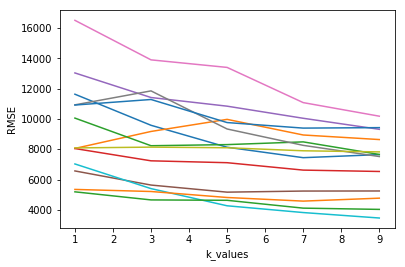

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
for k,v in k_rmse_results.items():
    x= list(v.keys())
    y= list(v.values())
    plt.plot(x,y)
    plt.xlabel('k_values')
    plt.ylabel('RMSE')

# Multivariate model

In [28]:
def knn_train_test(train_cols, tar_col, df):
    np.random.seed(1)
    
    # randomize order of rows in dataframe
    shuffled_index = np.random.permutation(df.index)
    df_rand = df.reindex(shuffled_index)
    
    # Divide the number of rows in half and round
    split_row = int(df_rand.shape[0]/2)
    
    train_df = df_rand.iloc[0:split_row]
    test_df = df_rand.iloc[split_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[tar_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[tar_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', cars_nor)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', cars_nor)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', cars_nor
                         )
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', cars_nor)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', cars_nor)
k_rmse_results["six best features"] = rmse_val

k_rmse_results
    
    
    

{'two best features': {5: 4101.835993458018},
 'three best features': {5: 4667.058347971058},
 'four best features': {5: 4700.647209324972},
 'five best features': {5: 4472.28040783856},
 'six best features': {5: 5276.406859120161}}

In [29]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])
        
        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', cars_nor)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', cars_nor)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', cars_nor)
k_rmse_results["five best features"] = rmse_val

k_rmse_results


{'three best features': {1: 5735.646464552765,
  2: 5075.219695288623,
  3: 4926.4303058965415,
  4: 4732.037891875816,
  5: 4667.058347971058,
  6: 4437.988070247729,
  7: 4345.218901096254,
  8: 4319.645682435329,
  9: 4257.078255067837,
  10: 4056.117243640575,
  11: 3841.054013222575,
  12: 3771.547555019985,
  13: 3742.3904526878387,
  14: 3710.563569783589,
  15: 3664.5312247852034,
  16: 3663.1663771807425,
  17: 3699.7072687311306,
  18: 3664.9609319077967,
  19: 3706.646638829761,
  20: 3748.3780072284944,
  21: 3769.0175507051745,
  22: 3783.373672423135,
  23: 3791.315416589624,
  24: 3774.4826410918363},
 'four best features': {1: 5902.90357987214,
  2: 4975.91862084652,
  3: 4654.808252902276,
  4: 4525.7886708088545,
  5: 4700.647209324972,
  6: 4486.437809269916,
  7: 4330.535012144851,
  8: 4144.331453873692,
  9: 4044.2880851737373,
  10: 3917.6550797209507,
  11: 3712.6547032638646,
  12: 3651.4525107114973,
  13: 3587.002257346896,
  14: 3560.1499998693894,
  15: 356

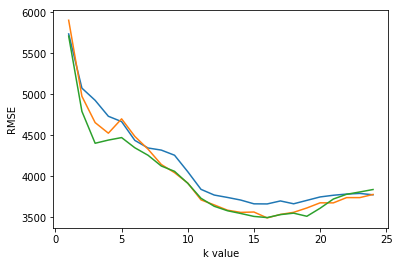

In [30]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')